In [ ]:
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

csv_path = "/content/drive/MyDrive/ProjectLabTMIT/captions_results_finalized - captions_results.csv"
df = pd.read_csv(csv_path)

In [ ]:
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

metrics = ["BLEU", "ROUGE-L", "BERTScore", "SBERT-Similarity"]

print("Loaded:", df.shape, "rows")
df.head()



Loaded: (50, 7) rows


,class_name,ground_truth,generated_caption,BLEU,ROUGE-L,BERTScore,SBERT-Similarity
0,pajama,"A young boy is sitting on the floor, working o...",A young boy in a pajama outfit is sitting on t...,0.382426,0.650000,0.949082,0.774951
1,canoe,A wooden canoe on display in a room.,A wooden canoe on display in a room. The canoe...,0.328858,0.551724,0.950850,0.839011
2,German shepherd,A German Shepherd dog running through the snow.,A large black and tan dog is curled up in a ba...,0.009724,0.139535,0.874636,0.275826
3,parachute,"Two people in a field with a parachute, a kite...","Two people in a field with a parachute, a kite...",0.331924,0.530612,0.938123,0.931607
4,bolete,"A mushroom with a slug on top, surrounded by o...",A mushroom growing in the wilderness. ';\nThe ...,0.029326,0.200000,0.870772,0.567579


In [ ]:
# ============================================================
# 2. Summary Statistics
# ============================================================

print("\n=== Global Metric Summary ===\n")
display(df[metrics].describe())

print("\nAverage scores:")
print(df[metrics].mean())



=== Global Metric Summary ===



,BLEU,ROUGE-L,BERTScore,SBERT-Similarity
count,50.000000,50.000000,50.000000,50.000000
mean,0.280532,0.384340,0.911838,0.640338
std,0.219871,0.152558,0.029063,0.204271
min,0.009724,0.139535,0.859734,0.261818
25%,0.111020,0.261442,0.891520,0.475864
50%,0.269167,0.385856,0.908565,0.678969
75%,0.380591,0.460440,0.936945,0.791032
max,0.921593,0.787879,0.966341,0.940122



Average scores:
BLEU                0.280532
ROUGE-L             0.384340
BERTScore           0.911838
SBERT-Similarity    0.640338
dtype: float64


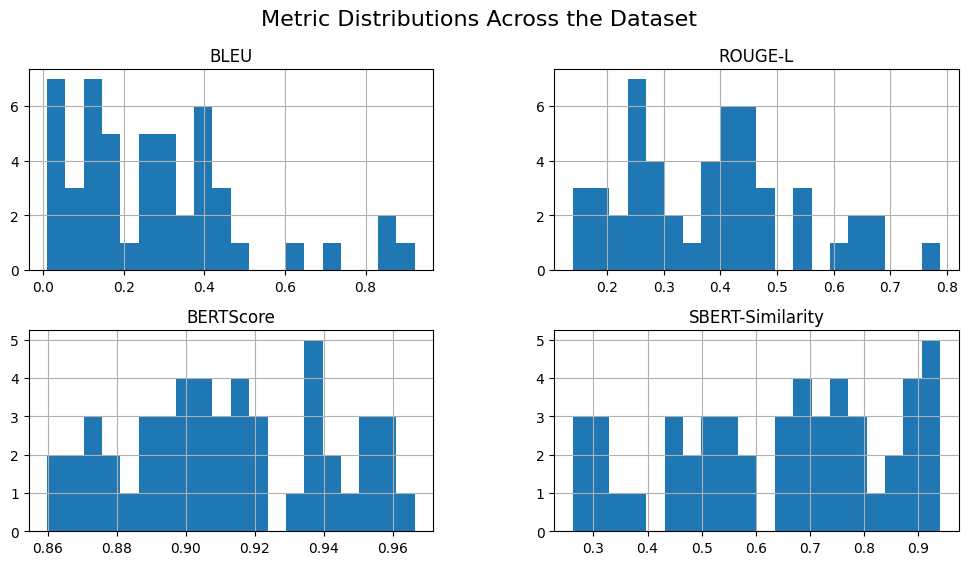

In [ ]:
# ============================================================
# 3. Metric Distributions
# ============================================================

df[metrics].hist(bins=20, figsize=(12,6))
plt.suptitle("Metric Distributions Across the Dataset", fontsize=16)
plt.show()


<Figure size 1400x800 with 0 Axes>

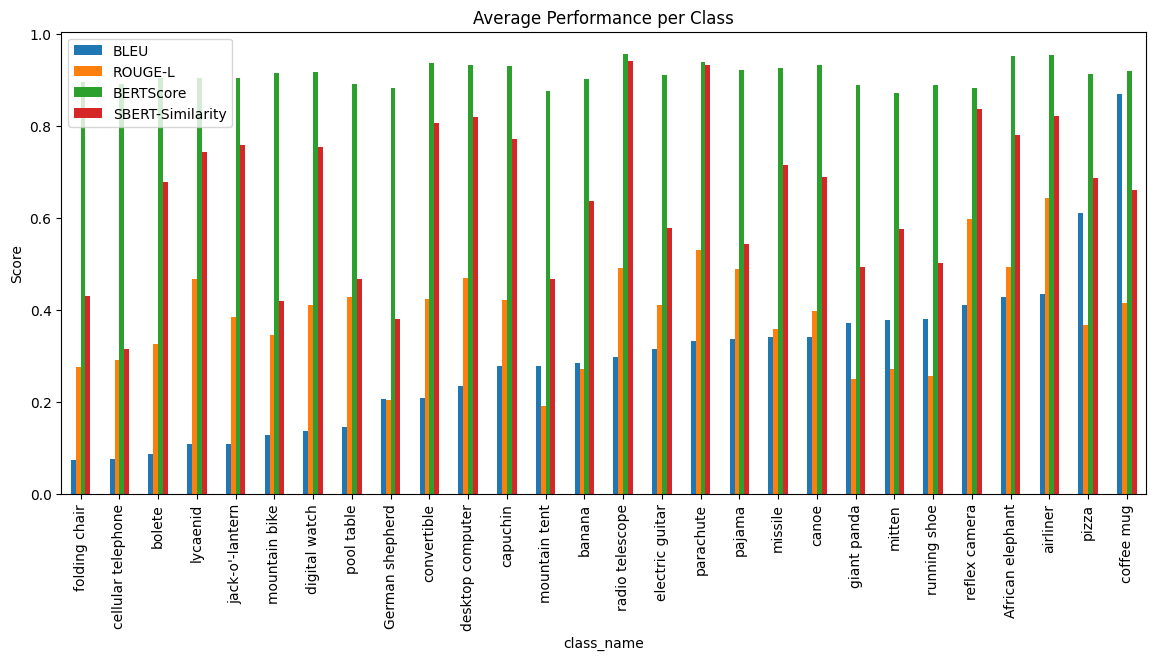


=== Per-Class Summary ===


,BLEU,ROUGE-L,BERTScore,SBERT-Similarity
class_name,,,,
folding chair,0.073947,0.276146,0.895972,0.429370
cellular telephone,0.075414,0.291667,0.891246,0.314430
bolete,0.085995,0.325926,0.904525,0.678098
lycaenid,0.107142,0.466667,0.903377,0.742046
jack-o'-lantern,0.107273,0.384615,0.904067,0.758262
mountain bike,0.128211,0.344345,0.915816,0.419557
digital watch,0.135978,0.410256,0.917555,0.753489
pool table,0.144795,0.428571,0.891093,0.466002
German shepherd,0.205240,0.204011,0.881231,0.380538


In [ ]:
# ============================================================
# 4. Class-Level Performance
# ============================================================

class_summary = df.groupby("class_name")[metrics].mean()
class_summary = class_summary.sort_values("BLEU")

plt.figure(figsize=(14,8))
class_summary.plot(kind="bar", figsize=(14,6))
plt.title("Average Performance per Class")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()

print("\n=== Per-Class Summary ===")
display(class_summary)


In [ ]:
# ============================================================
# 7. Ranking — Best & Worst Captions
# ============================================================

print("\n=== Top 10 Best (BERTScore) ===\n")
display(df.nlargest(10, "BERTScore")[["class_name","ground_truth","generated_caption","BERTScore"]])

print("\n=== Top 10 Worst (BERTScore) ===\n")
display(df.nsmallest(10, "BERTScore")[["class_name","ground_truth","generated_caption","BERTScore"]])



=== Top 10 Best (BERTScore) ===



,class_name,ground_truth,generated_caption,BERTScore
27,African elephant,A large elephant standing in a grassy field.,A large elephant standing in a grassy field. I...,0.966341
31,electric guitar,A man playing an electric guitar on stage.,A man playing an electric guitar on stage. A m...,0.959699
5,airliner,A large passenger jet on the tarmac at an airp...,A large passenger jet on the tarmac at an airp...,0.957241
14,radio telescope,The image shows two different views of a large...,The image shows two different views of a large...,0.956731
22,missile,A large missile on display in a museum.,A large missile on display in a museum. A miss...,0.953371
15,airliner,A large blue and white airplane on the runway.,A large blue and white airplane on the runway....,0.951051
1,canoe,A wooden canoe on display in a room.,A wooden canoe on display in a room. The canoe...,0.950850
0,pajama,"A young boy is sitting on the floor, working o...",A young boy in a pajama outfit is sitting on t...,0.949082
39,desktop computer,A desktop computer with a monitor displaying a...,A desktop computer with a monitor in the backg...,0.943975
37,bolete,A mushroom growing in a grassy area.,A mushroom growing in a forested area. The mus...,0.940338



=== Top 10 Worst (BERTScore) ===



,class_name,ground_truth,generated_caption,BERTScore
18,reflex camera,An old-fashioned camera with a flash attachmen...,An old-fashioned camera with a flash attachmen...,0.859734
21,electric guitar,A red and black electric guitar with flames on...,A group of people playing music on stage. A gr...,0.862726
7,German shepherd,The image is a book cover featuring a German S...,A large brown and black dog wearing a purple t...,0.866548
29,mitten,Two gray knitted gloves with frayed cuffs and ...,Two knitted gloves with a hand inside. This is...,0.870332
4,bolete,"A mushroom with a slug on top, surrounded by o...",A mushroom growing in the wilderness. ';\nThe ...,0.870772
43,German shepherd,A German Shepherd dog sitting on the grass.,A large brown and black dog sitting on the gra...,0.872357
2,German shepherd,A German Shepherd dog running through the snow.,A large black and tan dog is curled up in a ba...,0.874636
20,mountain tent,A portable pet tent with a black mesh top and ...,A small blue and white tent set up on a hillsi...,0.875900
32,folding chair,"A man in mid-air performing a breakdance move,...",A row of black folding chairs against a white ...,0.877998
19,giant panda,"A man is feeding a panda bear in an enclosure,...",A panda bear is hanging from a tree branch. It...,0.883629
